## **Code playground for SDA sem 6**

### **Tree**

Example simple implementation.

In [ ]:
class TreeNode:
    def __init__(self, value=None):
        self.left = None
        self.right = None
        self.value = value


n1 = TreeNode(1)
n2 = TreeNode(2)
n3 = TreeNode(3)

n1.left = n2
n1.right = n3

This would create the following tree. The example here is a binary tree, but standard trees can have more than 2 child nodes.

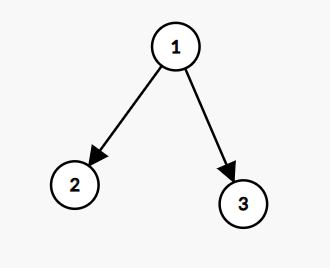

If we do not have a binary search tree, then we do not need anything more complex than the above class. If we need to use BST, then it will be easier to use a class:

In [ ]:
class Node:
    def __init__(self, val):
        self.left = None
        self.right = None
        self.val = val


class Tree:
    def __init__(self):
        self.root = None

    def get_root(self):
        return self.root

    def add(self, val):
        if not self.root:
            self.root = Node(val)
        else:
            self._add(val, self.root)

    def _add(self, val, node):
        if val < node.val:
            if node.left:
                self._add(val, node.left)
            else:
                node.left = Node(val)
        else:
            if node.right:
                self._add(val, node.right)
            else:
                node.right = Node(val)

    def find(self, val):
        if self.root:
            return self._find(val, self.root)

    def _find(self, val, node):
        if val == node.val:
            return node
        elif val < node.val and node.left:
            return self._find(val, node.left)
        elif val > node.val and node.right:
            return self._find(val, node.right)

    def delete_tree(self):
        # The garbage collector will do this for us.
        if self.root:
            self.root = None

    def view_tree(self):
        # Orchestrates the printing of the tree in order
        if self.root:
            self._view_tree(self.root)
        print()

    def _view_tree(self, node):
        if node:
            self._view_tree(node.left)
            print(node.val, end=" ")
            self._view_tree(node.right)


tree = Tree()

tree.add(3)
tree.add(5)
tree.add(2)
tree.add(8)
tree.add(0)
tree.add(4)

tree.view_tree()

print(tree.find(3).val)
print(tree.find(10))

0 2 3 4 5 8 
3
None


This is how our tree would look like:

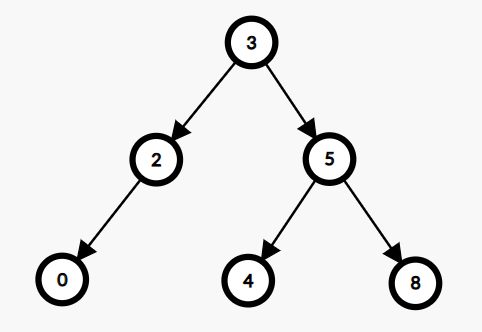

### **DFS**

We can already see a DFS (Depth-first search) traversal implementation in the above class, but let's take a closer look: 

In [ ]:
def dfs(current):
    if current is None:
        return

    dfs(current.left)
    print(current.val)
    dfs(current.right)


dfs(tree.get_root())

0
2
3
4
5
8


Time complexity is *O(V + E)*, where *V* is the number of nodes, and *E* is the number of edges.
Since we have a tree *E = V - 1*, meaning that the time complexity is *O(2V - 1) = O(V)*.

More use cases of DFS will be shown when solving challenges.

Let us try and understand better how the dfs works:

In [ ]:
def dfs(current):
    if current is None:
        return

    print(f"Entering node with val: {current.val} and going left.")
    dfs(current.left)
    print(f"Coming back to node with val: {current.val} and going right.")
    dfs(current.right)
    print(f"Coming back to node with val: {current.val} and exiting recursion.")


dfs(tree.get_root())

Entering node with val: 3 and going left.
Entering node with val: 2 and going left.
Entering node with val: 0 and going left.
Coming back to node with val: 0 and going right.
Coming back to node with val: 0 and exiting recursion.
Coming back to node with val: 2 and going right.
Coming back to node with val: 2 and exiting recursion.
Coming back to node with val: 3 and going right.
Entering node with val: 5 and going left.
Entering node with val: 4 and going left.
Coming back to node with val: 4 and going right.
Coming back to node with val: 4 and exiting recursion.
Coming back to node with val: 5 and going right.
Entering node with val: 8 and going left.
Coming back to node with val: 8 and going right.
Coming back to node with val: 8 and exiting recursion.
Coming back to node with val: 5 and exiting recursion.
Coming back to node with val: 3 and exiting recursion.


- Inorder traversal:

In [ ]:
def inorder(current):
    if current is None:
        return

    inorder(current.left)
    print(current.val, end=" ")  # 0 2 3 4 5 8
    inorder(current.right)


inorder(tree.get_root())

0 2 3 4 5 8 

- Preorder traversal:

In [ ]:
def preorder(current):
    if current is None:
        return

    print(current.val, end=" ")  # 3 2 0 5 4 8
    preorder(current.left)
    preorder(current.right)


preorder(tree.get_root())

3 2 0 5 4 8 

- Postorder traversal:

In [ ]:
def postorder(current):
    if current is None:
        return

    postorder(current.left)
    postorder(current.right)
    print(current.val, end=" ")  # 0 2 4 8 5 3


postorder(tree.get_root())

0 2 4 8 5 3 

- The DFS algorithm can also be rewritten *iteratively* using stack to simulate the recursion:

In [ ]:
def iterative_inorder(root):
    stack = []
    current = root

    while stack or current:
        if current:
            stack.append(current)
            current = current.left
        else:
            current = stack.pop()
            print(current.val, end=" ")  # 0 2 3 4 5 8
            current = current.right


iterative_inorder(tree.get_root())

0 2 3 4 5 8 

### **BFS**

Breadth-first search - also known as *Level order traversal*.

In [ ]:
from collections import deque


def bfs_deque(root):
    q = deque([root])
    level = 0

    while q:
        length = len(q)
        print(f"Level {level}:", end=" ")

        for _ in range(length):
            current = q.popleft()
            print(current.val, end=" ")

            if current.left:
                q.append(current.left)
            if current.right:
                q.append(current.right)

        print()
        level += 1


bfs_deque(tree.get_root())

Level 0: 3 
Level 1: 2 5 
Level 2: 0 4 8 


Variant with two queues:

In [ ]:
from queue import Queue


def bfs(root):
    q = Queue()
    q.put(root)

    while not q.empty():
        # Every time we complete a cycle in this while loop we go to the next level
        q_copy = Queue()  # For each level we will create a new queue, which will hold all the nodes from the next level
        while not q.empty():
            front = q.get()
            print(front.val)

            if front.left is not None:
                q_copy.put(front.left)
            if front.right is not None:
                q_copy.put(front.right)

        q = q_copy


bfs(tree.get_root())

3
2
5
0
4
8


Let's try and get better understanding of the level order traversal

In [ ]:
from collections import deque
from copy import deepcopy


def print_queue(q):
    lst = []
    while len(q):
        lst.append(str(q[0].val))
        q.popleft()

    return " ".join(lst)


def bfs(root):
    q = deque()
    q.append(root)
    level = 0
    while len(q):
        print(f"On level {level} the queue looks like this: [{print_queue(deepcopy(q))}]")
        q_copy = deque()
        while len(q):
            front = q[0]
            q.popleft()
            # print(front.val)

            if front.left is not None:
                q_copy.append(front.left)
            if front.right is not None:
                q_copy.append(front.right)

        q = q_copy
        level += 1


bfs(tree.get_root())

On level 0 the queue looks like this: [3]
On level 1 the queue looks like this: [2 5]
On level 2 the queue looks like this: [0 4 8]
